# Hypothesis Testing

In [1]:
from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from scipy import stats

import env as env

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

    - Has the network latency gone up since we switched internet service providers?
    - Is the website redesign any good?
    - Is our television ad driving more sales?

Data Sources:
- Archived round-trip time (RTT)

Hypotheses:
- $H_0$: There has been no change to RTT since switching ISPs

- $H_a$: RTT increased speed since swithing ISPs

Results:
- True Positive:
    - low p-value
    - RTT has increased speed since switching ISPs
- False Positive (Type I):
    - low p-value
    - RTT has increased speed, but not as a result of changing ISPs
- True Negative:
    - high p-value
    - RTT has not changed since switching ISPs
- False Negative (Type II):
    - high p-value
    - RTT has not changed, but 

Data Sources:
- Customer satisfaction surveys

Hypotheses:
- $H_0$: Customer satisfaction has not changed since website has been redesigned

- $H_a$: Customer satisfaction has improved since website has been redesigned

Results:
- True Positive:
    - low p-value
    - reject $H_0$
    - Customer satisfaction has improved as a result of the redesigned website
- False Positive (Type I):
    - low p-value
    - reject $H_0$
    - Customer satisfaction has improved, but as a result of a recent sale not the website redesign
- True Negative:
    - high p-value
    - fail to reject $H_0$
    - Customer satisfaction has not changed as a result of the redesigned website
- False Negative (Type II):
    - high p-value
    - fail to reject $H_0$
    - Customer satisfaction has not changed, but not as a direct result of the redesigned website but rather the company's unethical business practices

Data Sources:
- Sales by lead source data

Hypotheses:
- $H_0$: Sales directly attributed to TV ads have not changed as a result of the new TV add

- $H_a$: Sales directly attributed to TV ads have increased as a result of the new TV add

Results:
- True Positive:
    - low p-value
    - reject $H_0$
    - Sales attributed to TV ads have increased as a result of the new TV ad
- False Positive (Type I):
    - low p-value
    - reject $H_0$
    - Sales attributed to TV add has increases, but not because of the TV add but rather bad data entry from the sales professional
- True Negative:
    - high p-value
    - fail to reject $H_0$
    - Sales attributed to TV ads have not increased as a result of the new TV ad
- False Negative (Type II):
    - high p-value
    - fail to reject $H_0$
    - Sales attributed to TV adds have not increased, not a as a direct result of the TV add but rather people are streaming as opposed to watching TV.

---
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

# T-Test Exercises

$H_0$: There is no difference in the amount of time it takes to sell a home when comparing offices

$H_a$: There is a difference in the amount of time it takes to sell a home when comparing offices

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}} $$

In [2]:
alpha = .05

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt((1/n1) + (1/n2)))

In [3]:
t

-2.6252287036468456

use cdf for negative t values and sf for positive
p value is "how likely is is that we observe the t_stat or something more extreme?"

In [4]:
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

In [5]:
# from walk-through
t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

one_tailed_p = p / 2
one_tailed_p

0.005104926224619695

In [6]:
print(f"""
Because p ({p:.2f}) > alpha ({alpha}), we fail to reject the null hypothesis:
There is no difference in the amount of time it takes to sell a home when comparing offices

In plain english: I believe there is no difference in the amount of time it takes to sell a home between the two offices
""")


Because p (0.01) > alpha (0.05), we fail to reject the null hypothesis:
There is no difference in the amount of time it takes to sell a home when comparing offices

In plain english: I believe there is no difference in the amount of time it takes to sell a home between the two offices



---
- Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?

In [7]:
from pydataset import data

In [8]:
data("mpg", show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [9]:
mpg = data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


>Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

In [10]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
cty1 = mpg[mpg.year == 1999].cty
cty2 = mpg[mpg.year == 2008].cty

In [11]:
alpha = .05

t_stat, p = stats.ttest_ind(cty1, cty2)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 0.567
p = 0.571


In [12]:
print(f"""
Because p ({p:.3f}) > alpha ({alpha}), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999

In plain english: I believe there is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999
""")


Because p (0.571) > alpha (0.05), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999

In plain english: I believe there is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999



In [13]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
hwy1 = mpg[mpg.year == 1999].hwy
hwy2 = mpg[mpg.year == 2008].hwy

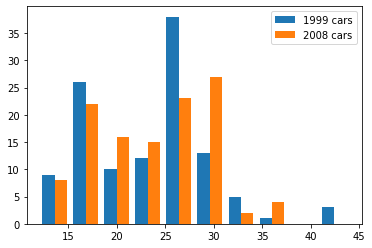

In [14]:
plt.hist([hwy1, hwy2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")
plt.show()

In [15]:
alpha = .05

t_stat, p = stats.ttest_ind(hwy1, hwy2)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = -0.0329
p = 0.974


In [16]:
print(f"""
Because p ({p:.3f}) > alpha ({alpha}), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) in cars from 2008 vs 1999

In plain english: I believe there is no significant difference in fuel-efficiency (hwy) in cars from 2008 vs 1999
""")


Because p (0.974) > alpha (0.05), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) in cars from 2008 vs 1999

In plain english: I believe there is no significant difference in fuel-efficiency (hwy) in cars from 2008 vs 1999



>Are compact cars more fuel-efficient than the average car?

$H_0$: There is no difference in fuel-efficiency between compact cars and the average car

$H_a$: There is a difference in fuel-efficiency between compact cars and the average car

In [17]:
# Are compact cars more fuel-efficient than the average car?
alpha = .05

x = mpg[mpg["class"] == "compact"].cty
mu = mpg.cty.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 6.62
p = 3.4e-08


In [18]:
p < alpha

True

In [19]:
print(f"""
Because p ({p:.8f}) < alpha ({alpha}), we reject the null hypothesis:
There is no difference in fuel-efficiency (cty) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (cty) is significantly different than the average car
""")


Because p (0.00000003) < alpha (0.05), we reject the null hypothesis:
There is no difference in fuel-efficiency (cty) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (cty) is significantly different than the average car



In [20]:
# Are compact cars more fuel-efficient than the average car?
alpha = .05

x = mpg[mpg["class"] == "compact"].hwy
mu = mpg.hwy.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 8.81
p = 1.97e-11


In [21]:
p < alpha

True

In [22]:
print(f"""
Because p ({p:.11f}) < alpha ({alpha}), we reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (hwy) is significantly different than the average car
""")


Because p (0.00000000002) < alpha (0.05), we reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (hwy) is significantly different than the average car



>Do manual cars get better gas mileage than automatic cars?

$H_0$: There is no difference in fuel-efficiency between manual and automatic cars

$H_a$: There is a difference in fuel-efficiency between manual and automatic cars

In [23]:
# Do manual cars get better gas mileage than automatic cars?
mpg["transmission"] = mpg["trans"].str[:-4]
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [24]:
mpg["avg_mpg"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual,22.0


In [25]:
alpha = .05

manual = mpg[mpg.transmission == "manual"].hwy
auto = mpg[mpg.transmission == "auto"].hwy

t_stat, p = stats.ttest_ind(manual, auto)
print(f"t = {t_stat}")
print(f"p = {p}")

t = 4.368349972819688
p = 1.888044765552951e-05


In [26]:
p < alpha

True

In [27]:
print(f"""
Because p ({p:.6f}) < alpha ({alpha}), we reject the null hypothesis:
There is no difference in fuel-efficiency between manual and automatic cars

In plain english: Fuel-efficiency for manual and automatic cars is significantly different.
""")


Because p (0.000019) < alpha (0.05), we reject the null hypothesis:
There is no difference in fuel-efficiency between manual and automatic cars

In plain english: Fuel-efficiency for manual and automatic cars is significantly different.



In [28]:
mpg.groupby("transmission").hwy.mean()

transmission
auto      22.292994
manual    25.779221
Name: hwy, dtype: float64

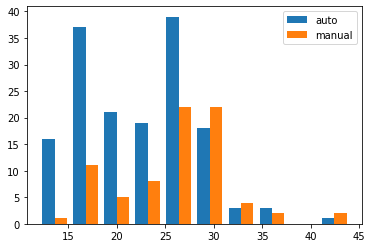

In [29]:
plt.hist([auto, manual], label=["auto", "manual"])
plt.legend()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

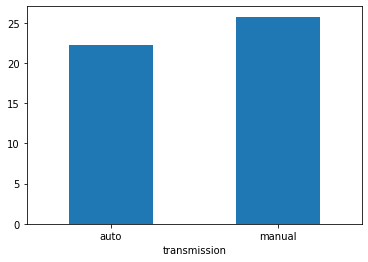

In [30]:
mpg.groupby("transmission").hwy.mean().plot.bar()
plt.xticks(rotation=0)

# Correlation Exercises

Correlation measures the linear relationship between two continuous variables

1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [31]:
telco_churn_url = env.get_db_url("telco_churn")

In [32]:
query = """
SELECT *
FROM customers
"""

customers = pd.read_sql(query, telco_churn_url)
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


> Does tenure correlate with monthly charges?

$H_0$: There is no linear relationship between tenure and monthly charges.

$H_a$: There is a linear relationship between tenure and monthly charges.

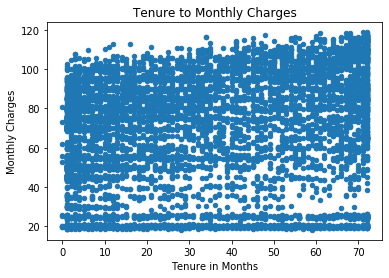

In [33]:
# Does tenure correlate with monthly charges?
customers.plot.scatter(x="tenure", y="monthly_charges")
plt.title("Tenure to Monthly Charges")
plt.xlabel("Tenure in Months")
plt.ylabel("Monthly Charges")
plt.show()

In [34]:
# Does tenure correlate with monthly charges?
alpha = .01
r, p = stats.pearsonr(customers.tenure, customers.monthly_charges)
print("r = ", r)
print("p = ", p)

r =  0.24789985628615008
p =  4.0940449915016345e-99


In [35]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
r, p

Reject null hypothesis


(0.24789985628615008, 4.0940449915016345e-99)

>As n increases (n is number of observations)

>It’s increasingly likely that detect smaller changes

>High enough n means we’ll get super low p values a lot

>Our pearsons doesn’t tell us the SIZE of the relationship

In [36]:
print(f"""Because p ({p}) < alpha ({alpha}),
we reject the null hypothesis that there is no linear
relationship between tenure and total charges.""")

Because p (4.0940449915016345e-99) < alpha (0.01),
we reject the null hypothesis that there is no linear
relationship between tenure and total charges.


In [37]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

In [38]:
customers.sort_values(by='total_charges').head(12)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,Yes,No,3,No,2,73.35,,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,Yes,3,52.55,,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,,No
5433,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,19.85,,No
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.00,,No
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,...,Yes,No,Yes,Yes,3,No,2,80.85,,No
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.25,,No
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,No,4,56.05,,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,No,Yes,No,No,3,Yes,3,61.90,,No


In [39]:
customers[customers["customer_id"] == "4075-WKNIU"].total_charges.sum()

' '

In [40]:
customers["total_charges"] = np.where(customers["total_charges"] == " ", "0.0", customers["total_charges"])
customers.sort_values(by='total_charges').head(12)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,Yes,No,3,No,2,73.35,0.0,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,Yes,3,52.55,0.0,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,0.0,No
5433,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,19.85,0.0,No
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.00,0.0,No
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,...,Yes,No,Yes,Yes,3,No,2,80.85,0.0,No
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.25,0.0,No
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,0.0,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,No,4,56.05,0.0,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,No,Yes,No,No,3,Yes,3,61.90,0.0,No


In [41]:
customers["total_charges"] = customers["total_charges"].astype(float)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

> Does tenure correlate with total charges?

$H_0$: There is no linear relationship between tenure and total charges.

$H_a$: There is a linear relationship between tenure and total charges.

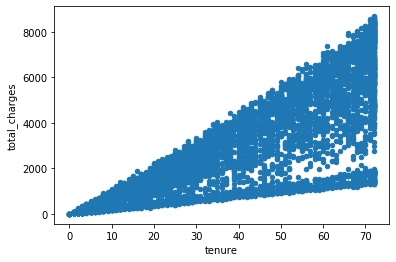

In [42]:
# Does tenure correlate with total charges?
customers.plot.scatter(x="tenure", y="total_charges")
plt.show()

In [43]:
# Does tenure correlate with total charges?
alpha = .01
r, p = stats.pearsonr(customers.tenure, customers.total_charges)
print("r = ", r)
print("p = ", p)

r =  0.826178397950242
p =  0.0


In [44]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
r, p

Reject null hypothesis


(0.826178397950242, 0.0)

>p value = probability of observing our data if the null hypothesis is true

In [45]:
print(f"Because p ({p}) < alpha ({alpha}), we reject the null hypothesis that there is no linear relationship between tenure and total charges.")

Because p (0.0) < alpha (0.01), we reject the null hypothesis that there is no linear relationship between tenure and total charges.


> Does tenure correlate with total charges when controlling for phone service?

$H_0$: There is no linear relationship between tenure and total charges when controlling for phone service.

$H_a$: There is a linear relationship between tenure and total charges when controlling for phone service.

In [46]:
# inner join is the default JOIN in MySQL
customer_internet_query = """
SELECT *
FROM customers
JOIN contract_types using(contract_type_id)
JOIN internet_service_types using(internet_service_type_id)
JOIN payment_types using(payment_type_id);
"""

customers_internet = pd.read_sql(customer_internet_query, telco_churn_url)
customers_internet

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4,3,3,9950-MTGYX,Male,0,Yes,Yes,28,Yes,...,No internet service,No internet service,No internet service,Yes,20.30,487.95,No,Two year,None,Credit card (automatic)
7039,2,3,3,9953-ZMKSM,Male,0,No,No,63,Yes,...,No internet service,No internet service,No internet service,No,25.25,1559.3,No,Two year,None,Mailed check
7040,4,3,3,9964-WBQDJ,Female,0,Yes,No,71,Yes,...,No internet service,No internet service,No internet service,Yes,24.40,1725.4,No,Two year,None,Credit card (automatic)
7041,3,3,3,9972-EWRJS,Female,0,Yes,Yes,67,Yes,...,No internet service,No internet service,No internet service,Yes,19.25,1372.9,No,Two year,None,Bank transfer (automatic)


In [47]:
# check for nulls in the columns of interest
assert customers_internet.total_charges.isna().sum() == 0, "There are missing values in this column. Handle them before proceeding."
assert customers_internet.monthly_charges.isna().sum() == 0, "There are missing values in this column. Handle them before proceeding"
assert customers_internet.tenure.isna().sum() == 0, "There are missing values in this column. Handle them before proceeding"

In [48]:
# check datatypes for columns of interest
customers_internet[["tenure", "monthly_charges", "total_charges"]].dtypes

tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

In [49]:
customers_internet.total_charges.value_counts().head()

         11
20.2     11
19.75     9
20.05     8
19.65     8
Name: total_charges, dtype: int64

In [50]:
# make any string with multiple spaces into an empty space value
customers_internet.total_charges = customers_internet.total_charges.str.strip()

# count the number of empty string entries
customers_internet[customers_internet["total_charges"] == ""]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1878,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1949,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2029,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
2048,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
2132,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
6143,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
6569,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
6605,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
6615,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
6686,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check


In [51]:
# remove those 11 rows
customers_internet = customers_internet[customers_internet.total_charges != ""]

# set the total_charges column to be a float
customers_internet.total_charges = customers_internet.total_charges.astype(float)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
customers_internet[["total_charges", "monthly_charges", "tenure"]].dtypes

total_charges      float64
monthly_charges    float64
tenure               int64
dtype: object

In [53]:
customers_internet.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

In [54]:
phone_no_internet = customers_internet[(customers_internet.phone_service == "Yes") & (customers_internet.internet_service_type == "None")]
phone_no_internet = phone_no_internet[["tenure", "monthly_charges", "total_charges"]]

In [55]:
phone_no_internet

,tenure,monthly_charges,total_charges
5517,3,19.85,57.20
5518,4,20.35,76.35
5519,27,19.40,529.80
5520,1,19.85,19.85
5521,10,19.95,187.75
...,...,...,...
7038,28,20.30,487.95
7039,63,25.25,1559.30
7040,71,24.40,1725.40
7041,67,19.25,1372.90


In [56]:
r, p = stats.pearsonr(phone_no_internet.tenure, phone_no_internet.total_charges)
r, p

(0.9814648859044289, 0.0)

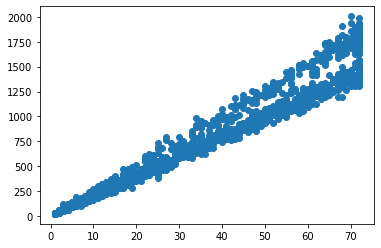

In [57]:
plt.scatter(phone_no_internet.tenure, phone_no_internet.total_charges)

In [58]:
phone_fiber = customers_internet[(customers_internet.phone_service == "Yes") & (customers_internet.internet_service_type == "Fiber optic")]
phone_fiber = phone_fiber[["tenure", "monthly_charges", "total_charges"]]

In [59]:
phone_fiber

,tenure,monthly_charges,total_charges
2421,4,73.90,280.85
2422,13,98.00,1237.85
2423,3,83.90,267.40
2424,5,68.95,351.50
2425,1,72.10,72.10
...,...,...,...
5512,72,118.20,8547.15
5513,60,97.20,5611.75
5514,68,99.55,6668.00
5515,72,103.95,7517.70


In [60]:
phone_DSL = customers_internet[(customers_internet.phone_service == "Yes") & (customers_internet.internet_service_type == "DSL")]
phone_DSL = phone_DSL[["tenure", "monthly_charges", "total_charges"]]


In [61]:
phone_DSL

,tenure,monthly_charges,total_charges
0,9,59.90,542.40
1,9,69.40,571.45
2,7,48.20,340.35
5,2,49.25,91.10
7,1,44.30,44.30
...,...,...,...
2409,72,80.85,5727.45
2411,34,67.65,2339.30
2416,72,84.10,5981.65
2417,72,76.80,5468.45


> Does tenure correlate with total charges when controlling for internet service?

$H_0$: There is no linear relationship between tenure and total charges when controlling for internet service.

$H_a$: There is a linear relationship between tenure and total charges when controlling for internet service.

---
2. Use the employees database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [62]:
employees_url = env.get_db_url("employees")

In [63]:
# """SELECT emp_no, salary, datediff(CURDATE(), hire_date) as days
# FROM salaries
# JOIN employees using(emp_no)
# WHERE to_date > CURDATE()"""

In [64]:
query = """
SELECT e.emp_no, e.birth_date, CONCAT(e.first_name, " ", e.last_name) AS full_name, e.gender, e.hire_date, s.salary, s.from_date, s.to_date
FROM employees AS e
JOIN salaries AS s ON e.emp_no = s.emp_no
WHERE s.to_date = "9999-01-01";
"""

employee_salaries = pd.read_sql(query, employees_url)
employee_salaries

,emp_no,birth_date,full_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [65]:
employee_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 8 columns):
emp_no        240124 non-null int64
birth_date    240124 non-null object
full_name     240124 non-null object
gender        240124 non-null object
hire_date     240124 non-null object
salary        240124 non-null int64
from_date     240124 non-null object
to_date       240124 non-null object
dtypes: int64(2), object(6)
memory usage: 14.7+ MB


In [66]:
# def remove_hyphen(string):
#     return string.replace("-", "")

# remove_hyphen("9999-01-01")

In [67]:
employee_salaries["to_date"] = np.where(employee_salaries["to_date"].astype(str) == "9999-01-01", "2002-08-01", employee_salaries["to_date"])
employee_salaries

,emp_no,birth_date,full_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,88958,2002-06-22,2002-08-01
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,72527,2001-08-02,2002-08-01
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,43311,2001-12-01,2002-08-01
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,74057,2001-11-27,2002-08-01
4,10005,1955-01-21,Kyoichi Maliniak,M,1989-09-12,94692,2001-09-09,2002-08-01
...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang Lichtner,F,1993-01-12,52868,2002-06-01,2002-08-01
240120,499996,1953-03-07,Zito Baaz,M,1990-09-27,69501,2002-05-12,2002-08-01
240121,499997,1961-08-03,Berhard Lenart,M,1986-04-21,83441,2001-08-26,2002-08-01
240122,499998,1956-09-05,Patricia Breugel,M,1993-10-13,55003,2001-12-25,2002-08-01


In [68]:
employee_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 8 columns):
emp_no        240124 non-null int64
birth_date    240124 non-null object
full_name     240124 non-null object
gender        240124 non-null object
hire_date     240124 non-null object
salary        240124 non-null int64
from_date     240124 non-null object
to_date       240124 non-null object
dtypes: int64(2), object(6)
memory usage: 14.7+ MB


In [69]:
employee_salaries["to_date"] = pd.to_datetime(employee_salaries["to_date"])
employee_salaries["to_date"]

0        2002-08-01
1        2002-08-01
2        2002-08-01
3        2002-08-01
4        2002-08-01
            ...    
240119   2002-08-01
240120   2002-08-01
240121   2002-08-01
240122   2002-08-01
240123   2002-08-01
Name: to_date, Length: 240124, dtype: datetime64[ns]

In [70]:
employee_salaries["from_date"] = pd.to_datetime(employee_salaries["from_date"])
employee_salaries["from_date"]

0        2002-06-22
1        2001-08-02
2        2001-12-01
3        2001-11-27
4        2001-09-09
            ...    
240119   2002-06-01
240120   2002-05-12
240121   2001-08-26
240122   2001-12-25
240123   2001-11-29
Name: from_date, Length: 240124, dtype: datetime64[ns]

In [71]:
employee_salaries["hire_date"] = pd.to_datetime(employee_salaries["hire_date"])
employee_salaries["hire_date"]

0        1986-06-26
1        1985-11-21
2        1986-08-28
3        1986-12-01
4        1989-09-12
            ...    
240119   1993-01-12
240120   1990-09-27
240121   1986-04-21
240122   1993-10-13
240123   1997-11-30
Name: hire_date, Length: 240124, dtype: datetime64[ns]

In [72]:
employee_salaries["tenure"] = (employee_salaries["to_date"] - employee_salaries["hire_date"]).dt.days
employee_salaries

,emp_no,birth_date,full_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,88958,2002-06-22,2002-08-01,5880
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,72527,2001-08-02,2002-08-01,6097
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,43311,2001-12-01,2002-08-01,5817
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,74057,2001-11-27,2002-08-01,5722
4,10005,1955-01-21,Kyoichi Maliniak,M,1989-09-12,94692,2001-09-09,2002-08-01,4706
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang Lichtner,F,1993-01-12,52868,2002-06-01,2002-08-01,3488
240120,499996,1953-03-07,Zito Baaz,M,1990-09-27,69501,2002-05-12,2002-08-01,4326
240121,499997,1961-08-03,Berhard Lenart,M,1986-04-21,83441,2001-08-26,2002-08-01,5946
240122,499998,1956-09-05,Patricia Breugel,M,1993-10-13,55003,2001-12-25,2002-08-01,3214


> Is there a relationship between how long an employee has been with the company and their salary?

$H_0$: There is no linear relationship between how long an employee has been with the company and their salary

$H_a$: There is a linear relationship between how long an employee has been with the company and their salary

In [73]:

employee_salaries["tenure"]

0         5880
1         6097
2         5817
3         5722
4         4706
          ... 
240119    3488
240120    4326
240121    5946
240122    3214
240123    1705
Name: tenure, Length: 240124, dtype: int64

<Figure size 1152x648 with 0 Axes>

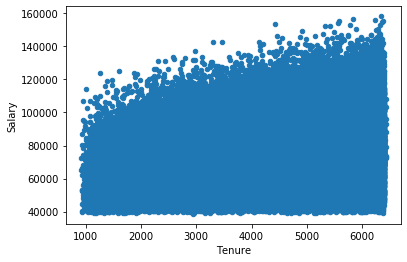

In [74]:
plt.figure(figsize=(16,9))
employee_salaries.plot.scatter(x="tenure", y="salary")
plt.xlabel("Tenure")
plt.ylabel("Salary")
plt.show()

In [75]:
r, p = stats.pearsonr(employee_salaries.tenure, employee_salaries.salary)
print("r =", r)
print("p =", p)

r = 0.3064625613186078
p = 0.0


In [76]:
p < alpha

True

In [77]:
print(f"""Because p ({p}) < alpha ({alpha}), we reject the null hypothesis that there is no linear relationship between how long 
      an employee has been with the company and their salary.""")

Because p (0.0) < alpha (0.01), we reject the null hypothesis that there is no linear relationship between how long 
      an employee has been with the company and their salary.


> Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [78]:
# SELECT emp_no, datediff(CURDATE(), hire_date) as tenure, count(*) as titles
# FROM employees

In [79]:
query = """
SELECT e.emp_no, e.birth_date, CONCAT(e.first_name, " ", e.last_name) AS full_name, e.gender, e.hire_date, t.title, t.from_date, t.to_date
FROM employees AS e
JOIN titles AS t ON e.emp_no = t.emp_no;"""

employee_titles = pd.read_sql(query, employees_url)
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [80]:
employee_titles["number_of_titles"] = employee_titles.groupby("emp_no").title.count()
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,NaN
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,NaN
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,NaN
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,NaN
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,NaN
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,2.0
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,1.0
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,1.0
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,2.0


In [81]:
employee_titles["number_of_titles"] = employee_titles.groupby("emp_no").title.transform("count")
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,1
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,1
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,1
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,2
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,2
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,2
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,2
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,2
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,2


In [82]:
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,1
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,1
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,1
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,2
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,2
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,2
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,2
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,2
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,2


In [83]:
employee_titles["to_date"].max()

datetime.date(9999, 1, 1)

In [84]:
last_real_date = employee_titles["to_date"].drop_duplicates().sort_values(ascending=False).iloc[1]
last_real_date

datetime.date(2002, 8, 1)

In [85]:
employee_titles["to_date"] = np.where(employee_titles["to_date"].astype(str) == "9999-01-01", last_real_date, employee_titles["to_date"])
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,2002-08-01,1
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,2002-08-01,1
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2002-08-01,1
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,2
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2002-08-01,2
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,2
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,2002-08-01,2
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,2002-08-01,2
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,2


In [86]:
employee_titles["to_date"] = pd.to_datetime(employee_titles["to_date"])
employee_titles["to_date"]

0        2002-08-01
1        2002-08-01
2        2002-08-01
3        1995-12-01
4        2002-08-01
            ...    
443303   1992-08-29
443304   2002-08-01
443305   2002-08-01
443306   1998-12-27
443307   2002-08-01
Name: to_date, Length: 443308, dtype: datetime64[ns]

In [87]:
employee_titles["from_date"] = pd.to_datetime(employee_titles["from_date"])
employee_titles["from_date"]

0        1986-06-26
1        1996-08-03
2        1995-12-03
3        1986-12-01
4        1995-12-01
            ...    
443303   1987-08-30
443304   1992-08-29
443305   1998-12-27
443306   1993-12-27
443307   1997-11-30
Name: from_date, Length: 443308, dtype: datetime64[ns]

In [88]:
employee_titles["hire_date"] = pd.to_datetime(employee_titles["hire_date"])
employee_titles["hire_date"]

0        1986-06-26
1        1985-11-21
2        1986-08-28
3        1986-12-01
4        1986-12-01
            ...    
443303   1986-04-21
443304   1986-04-21
443305   1993-10-13
443306   1993-10-13
443307   1997-11-30
Name: hire_date, Length: 443308, dtype: datetime64[ns]

In [89]:
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,2002-08-01,1
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,2002-08-01,1
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2002-08-01,1
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,2
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2002-08-01,2
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,2
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,2002-08-01,2
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,2002-08-01,2
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,2


In [90]:
employee_titles["tenure"] = (employee_titles["to_date"] - employee_titles["hire_date"]).dt.days
employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles,tenure
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,2002-08-01,1,5880
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,2002-08-01,1,6097
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2002-08-01,1,5817
3,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,2,3287
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2002-08-01,2,5722
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,2,2322
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,2002-08-01,2,5946
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,2002-08-01,2,3214
443306,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,2,1901


In [91]:
unique_employee_titles = employee_titles.loc[employee_titles.groupby("emp_no")["tenure"].idxmax()]
unique_employee_titles

,emp_no,birth_date,full_name,gender,hire_date,title,from_date,to_date,number_of_titles,tenure
0,10001,1953-09-02,Georgi Facello,M,1986-06-26,Senior Engineer,1986-06-26,2002-08-01,1,5880
1,10002,1964-06-02,Bezalel Simmel,F,1985-11-21,Staff,1996-08-03,2002-08-01,1,6097
2,10003,1959-12-03,Parto Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2002-08-01,1,5817
4,10004,1954-05-01,Chirstian Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2002-08-01,2,5722
5,10005,1955-01-21,Kyoichi Maliniak,M,1989-09-12,Senior Staff,1996-09-12,2002-08-01,2,4706
...,...,...,...,...,...,...,...,...,...,...
443300,499995,1958-09-24,Dekang Lichtner,F,1993-01-12,Engineer,1997-06-02,2002-08-01,1,3488
443302,499996,1953-03-07,Zito Baaz,M,1990-09-27,Senior Engineer,2002-05-13,2002-08-01,2,4326
443304,499997,1961-08-03,Berhard Lenart,M,1986-04-21,Senior Engineer,1992-08-29,2002-08-01,2,5946
443305,499998,1956-09-05,Patricia Breugel,M,1993-10-13,Senior Staff,1998-12-27,2002-08-01,2,3214


$H_0$: There is no relationship between how long an employee has been with the company and the number of titles they have held

$H_a$: There is a relationship between how long an employee has been with the company and the number of titles they have held

In [92]:
r, p = stats.pearsonr(unique_employee_titles.number_of_titles, unique_employee_titles.tenure)
print("r =", r)
print("p =", p)

r = 0.3852276918701187
p = 0.0


In [93]:
p < alpha

True

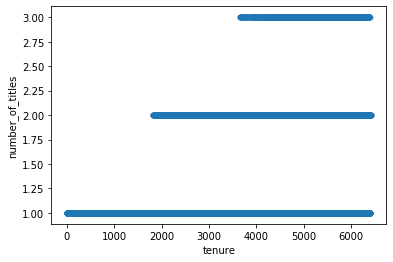

In [94]:
unique_employee_titles.plot.scatter("tenure", "number_of_titles")

In [95]:
print(f"""Because p ({p}) < alpha ({alpha}), we reject the null hypothesis that there is no relationship between how long an
employee has been with the company and the number of titles they have held.""")

Because p (0.0) < alpha (0.01), we reject the null hypothesis that there is no relationship between how long an
employee has been with the company and the number of titles they have held.


> 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

$H_0$: There is no relationship between days and reaction time

$H_a$: There is a relationship between days and reaction time

In [96]:
# how to programmatically search for dataframes with "sleep"
# from pydataset import data
# df = data()
# df[df.title.str.contains("sleep")]

In [97]:
import pydataset

In [98]:
sleep = data("sleepstudy")
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


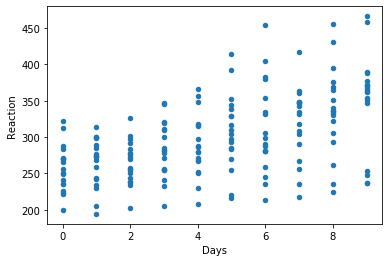

In [99]:
sleep.plot.scatter("Days", "Reaction")

In [100]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days)
print("r =", r)
print("p =", p)

r = 0.5352302262650253
p = 9.894096322214812e-15


In [101]:
p < alpha

True

In [102]:
print(f"""Because p ({p}) < alpha ({alpha}), we reject the null hypothesis that there is no relationship between days and reaction time.""")

Because p (9.894096322214812e-15) < alpha (0.01), we reject the null hypothesis that there is no relationship between days and reaction time.


---
# Chi Square Exercises

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [148]:
# df = pd.DataFrame({
#     "": ["Uses a Macbook", "Doesn't Use A Macbook"],
#     "Codeup Student": [49, 1],
#     "Not Codeup Student": [20, 30]
# })

# df

In [149]:
index = ["Uses a Macbook", "Doesn't Use A Macbook"]
columns = ["Codeup Student", "Not Codeup Student"]

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [143]:
# df = df.set_index("")

In [151]:
# df

$H_0$: MacBook usage and Codeup student status are independent of each other

$H_a$: MacBook usage and Codeup student status are dependent

In [155]:
alpha = .01

chi2_stat, p, degf, expected = stats.chi2_contingency(observed)
print("chi2 =", chi2_stat)
print("p =", p)
print("degf =", degf)
print("expected =", expected)

chi2 = 36.65264142122487
p = 1.4116760526193828e-09
degf = 1
expected = [[34.5 34.5]
 [15.5 15.5]]


In [158]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


---
2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [157]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual,22.0


In [162]:
ctab = pd.crosstab(mpg.manufacturer, mpg["class"])
ctab

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


$H_0$: Manufacturer and vehicle class are independent of each other

$H_a$: Manufacturer and vehicle class are dependent

In [164]:
alpha = .01

chi2_stat, p, degf, expected = stats.chi2_contingency(ctab)
print("chi2 =", chi2_stat)
print("p =", p)
print("degf =", degf)
print("expected =", expected)

chi2 = 464.37214690582
p = 5.267718408816259e-54
degf = 84
expected = [[0.38461538 3.61538462 3.15384615 0.84615385 2.53846154 2.69230769
  4.76923077]
 [0.40598291 3.81623932 3.32905983 0.89316239 2.67948718 2.84188034
  5.03418803]
 [0.79059829 7.43162393 6.48290598 1.73931624 5.21794872 5.53418803
  9.8034188 ]
 [0.53418803 5.02136752 4.38034188 1.17521368 3.52564103 3.73931624
  6.62393162]
 [0.19230769 1.80769231 1.57692308 0.42307692 1.26923077 1.34615385
  2.38461538]
 [0.2991453  2.81196581 2.45299145 0.65811966 1.97435897 2.09401709
  3.70940171]
 [0.17094017 1.60683761 1.4017094  0.37606838 1.12820513 1.1965812
  2.11965812]
 [0.08547009 0.8034188  0.7008547  0.18803419 0.56410256 0.5982906
  1.05982906]
 [0.06410256 0.6025641  0.52564103 0.14102564 0.42307692 0.44871795
  0.79487179]
 [0.08547009 0.8034188  0.7008547  0.18803419 0.56410256 0.5982906
  1.05982906]
 [0.27777778 2.61111111 2.27777778 0.61111111 1.83333333 1.94444444
  3.44444444]
 [0.10683761 1.0042735  0.87606

In [165]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


---
3. Use the data from the employees database to answer these questions:

    - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    - Is an employee's gender independent of whether or not they are or have been a manager?

In [212]:
query = """
SELECT e.emp_no, e.gender, de.to_date, d.dept_name
FROM employees AS e
JOIN dept_emp AS de USING(emp_no)
JOIN departments AS d USING(dept_no)
WHERE de.to_date > CURDATE()
AND (de.dept_no = "d001"
OR de.dept_no = "d007");"""

In [213]:
employees = env.get_db_url("employees")

In [214]:
emp_dept = pd.read_sql(query, employees)
emp_dept

,emp_no,gender,to_date,dept_name
0,10017,F,9999-01-01,Marketing
1,10058,M,9999-01-01,Marketing
2,10140,F,9999-01-01,Marketing
3,10228,F,9999-01-01,Marketing
4,10239,F,9999-01-01,Marketing
...,...,...,...,...
52538,499966,F,9999-01-01,Sales
52539,499976,M,9999-01-01,Sales
52540,499980,M,9999-01-01,Sales
52541,499986,F,9999-01-01,Sales


In [215]:
emp_dept.to_date.value_counts()

9999-01-01    52543
Name: to_date, dtype: int64

In [216]:
emp_dept.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

>Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: An employee's gender is indepedent of whether or not they work in sales or marketing

$H_a$: An employee's gender is dependent on whether or not they work in sales or marketing

In [204]:
ctab = pd.crosstab(emp_dept.gender, emp_dept.dept_name)
ctab

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [205]:
alpha = .01

chi2_stat, p, degf, expected = stats.chi2_contingency(ctab)
print("chi2 =", chi2_stat)
print("p =", p)
print("degf =", degf)
print("expected =", expected)

chi2 = 0.3240332004060638
p = 0.5691938610810126
degf = 1
expected = [[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]


In [206]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


> Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: An employee's gender is indepedent of whether or not they are or have been a manager

$H_a$: An employee's gender is dependent on whether or not they are or have been a manager

In [221]:
# query = """
# SELECT e.emp_no, e.gender, dm.dept_no
# FROM employees AS e
# LEFT JOIN dept_manager AS dm ON e.emp_no = dm.emp_no;"""

In [223]:
query = """
SELECT
    e.emp_no IN (SELECT emp_no FROM dept_manager) AS is_manager,
    e.gender
FROM employees e"""

In [224]:
emp_mgr = pd.read_sql(query, employees)
emp_mgr

,is_manager,gender
0,0,M
1,0,F
2,0,M
3,0,M
4,0,M
...,...,...
300019,0,F
300020,0,M
300021,0,M
300022,0,M


In [225]:
observed = pd.crosstab(emp_mgr.gender, emp_mgr.is_manager)
observed

is_manager,0,1
gender,,
F,120038,13
M,179962,11


In [228]:
alpha = .01

chi2_stat, p, degf, expected = stats.chi2_contingency(observed)
print("chi2 =", chi2_stat)
print("p =", p)
print("degf =", degf)
print("expected =", expected)

chi2 = 1.4566857643547197
p = 0.22745818732810363
degf = 1
expected = [[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]


In [229]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis
